In [1]:
import tensorflow as tf
import os
from tensorflow import keras
import keras_preprocessing as kp
import cv2
import imghdr
#https://www.kaggle.com/code/kausthubkannan/ai-human-art-classification-mobilenetv2-91/notebook

In [2]:
os.listdir('AIandRealArt/train/')
data_loc = 'AIandRealArt/train/'

In [3]:
imgtypes = ['jpg','png','jpeg']
for iclass in os.listdir(data_loc):
    for image in os.listdir(os.path.join(data_loc,iclass)):
        image_path = os.path.join(data_loc,iclass,image)
        try:
            img = cv2.imread(image_path)
            typ = imghdr.what(image_path)
            if typ not in imgtypes:
                os.remove(image_path)
                print('Issue 1')
        except Exception as e:
            print("Issue")

In [4]:
import numpy as np
from matplotlib import  pyplot as plt

In [5]:
data = tf.keras.preprocessing.image_dataset_from_directory(data_loc,shuffle =True)

Found 18618 files belonging to 2 classes.


In [6]:
data_it = data.as_numpy_iterator()

In [7]:
batch = data_it.next()

In [8]:
batch[0].shape

(32, 256, 256, 3)

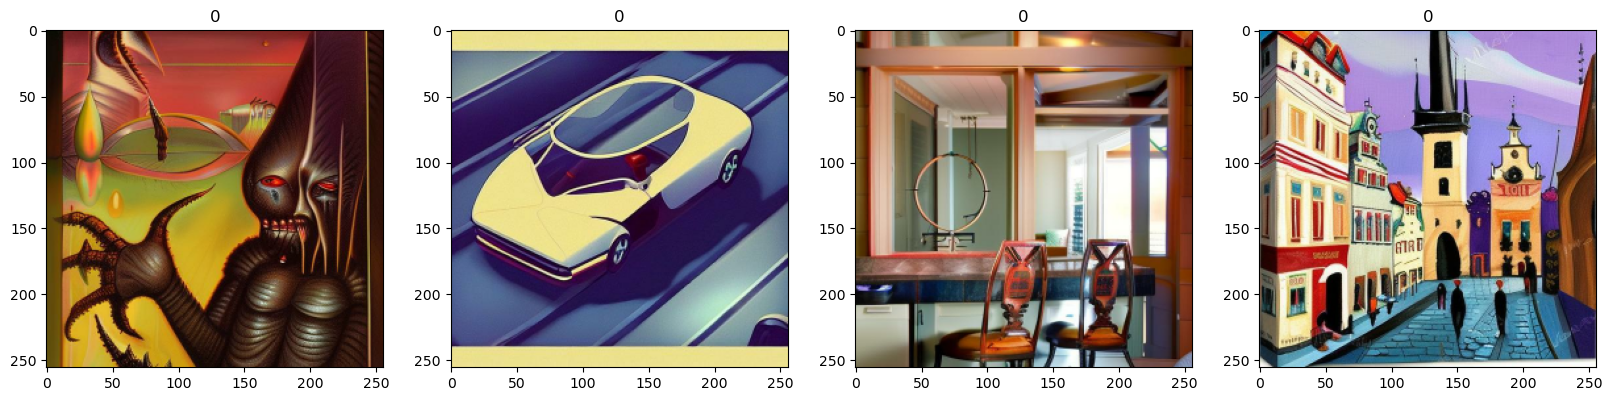

In [9]:
fig, ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

1 - Real
0 - AI

In [11]:
data_scaled = data.map(lambda x,y :((x/255),y))

In [12]:
scaled_it = data_scaled.as_numpy_iterator()

In [14]:
batch_scaled = scaled_it.next()
batch_scaled[0]

array([[[[0.68039215, 0.5470588 , 0.39803922],
         [0.6784314 , 0.54509807, 0.39607844],
         [0.6745098 , 0.5411765 , 0.39215687],
         ...,
         [0.66862744, 0.54313725, 0.39019608],
         [0.6764706 , 0.5509804 , 0.39803922],
         [0.68039215, 0.55490196, 0.4019608 ]],

        [[0.68039215, 0.5470588 , 0.39803922],
         [0.6784314 , 0.54509807, 0.39607844],
         [0.6745098 , 0.5411765 , 0.39215687],
         ...,
         [0.66862744, 0.54313725, 0.39019608],
         [0.6764706 , 0.5509804 , 0.39803922],
         [0.68039215, 0.55490196, 0.4019608 ]],

        [[0.68039215, 0.5470588 , 0.39803922],
         [0.6784314 , 0.54509807, 0.39607844],
         [0.6745098 , 0.5411765 , 0.39215687],
         ...,
         [0.66862744, 0.54313725, 0.39019608],
         [0.6764706 , 0.5509804 , 0.39803922],
         [0.68039215, 0.55490196, 0.4019608 ]],

        ...,

        [[0.68039215, 0.5470588 , 0.39803922],
         [0.6784314 , 0.54509807, 0.39607844]

In [15]:
for batch in scaled_it:
    temp = list(batch)
    temp[0] = tf.keras.utils.normalize(temp[0], axis = 1)
    batch = tuple(batch)

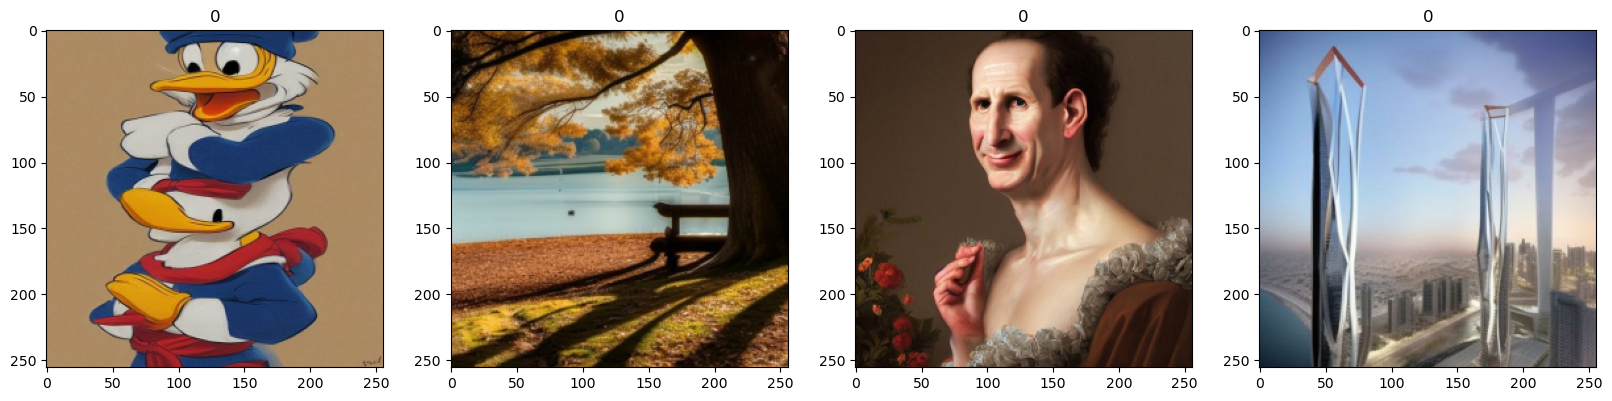

In [20]:
fig, ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx,img in enumerate(batch_scaled[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch_scaled[1][idx])

In [22]:
train_size = int(len(data_scaled)*0.7)
val_size = int(len(data_scaled)*0.2)+1
test_size = int(len(data_scaled)*0.1)+1

In [23]:
train = data_scaled.take(train_size)
test = data_scaled.skip(train_size).take(test_size)
validation = data_scaled.skip(train_size).skip(test_size).take(val_size)

In [24]:
train_it = train.as_numpy_iterator()
(train_it.next()[0])

array([[[[0.36568627, 0.56960785, 0.7970588 ],
         [0.35784313, 0.5735294 , 0.8088235 ],
         [0.39215687, 0.62058824, 0.8666667 ],
         ...,
         [0.40784314, 0.65686274, 0.9098039 ],
         [0.3852941 , 0.6382353 , 0.8715686 ],
         [0.32352942, 0.57843137, 0.7980392 ]],

        [[0.36960784, 0.5754902 , 0.81078434],
         [0.3627451 , 0.58235294, 0.8245098 ],
         [0.40392157, 0.6382353 , 0.8833333 ],
         ...,
         [0.40490195, 0.654902  , 0.904902  ],
         [0.3970588 , 0.65      , 0.8813726 ],
         [0.3480392 , 0.60294116, 0.8186275 ]],

        [[0.34411764, 0.5627451 , 0.80784315],
         [0.3382353 , 0.5647059 , 0.8127451 ],
         [0.38431373, 0.6245098 , 0.87941176],
         ...,
         [0.40490195, 0.64509803, 0.89411765],
         [0.40490195, 0.6480392 , 0.877451  ],
         [0.37156862, 0.61764705, 0.83235294]],

        ...,

        [[0.5647059 , 0.5921569 , 0.6313726 ],
         [0.5921569 , 0.61960787, 0.6509804 ]

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D, Dropout

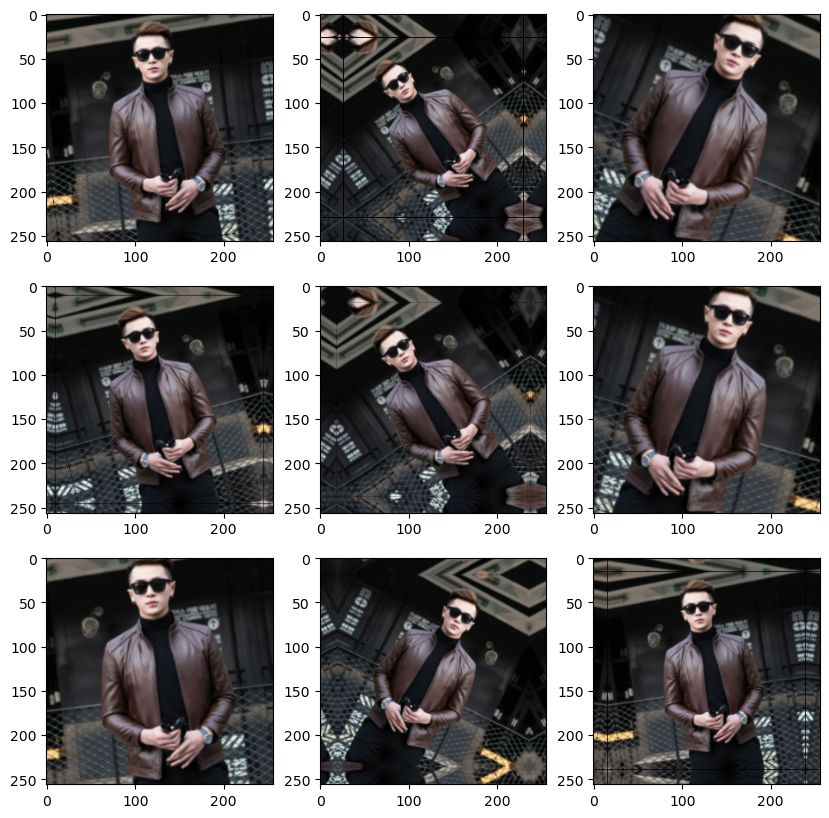

In [26]:
data_aug = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.3)
    ]
)
plt.figure(figsize=(10,10))
for images , _ in train.take(1):
    for i in range(9):
        augmented_images = data_aug(images)
        ax = plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0])

In [27]:
model = Sequential()

In [28]:
model.add(data_aug)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [32]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train,epochs=20,validation_data=validation)


Epoch 1/20
  1/407 [..............................] - ETA: 4s - loss: 0.6456 - accuracy: 0.7188WARNING:tensorflow:From c:\Users\thedu\anaconda3\envs\tens\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
407/407 [==============================] - 729s 2s/step - loss: 0.6800 - accuracy: 0.7062 - val_loss: 0.5528 - val_accuracy: 0.7134
Epoch 2/20
 57/407 [===>..........................] - ETA: 8:47 - loss: 0.5452 - accuracy: 0.7133

In [30]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
fig  = plt.figure()
plt.plot(hist.history["loss"],color='red')
plt.plot(hist.history["val_loss"],color='blue')
plt.show()
fig  = plt.figure()
plt.plot(hist.history["accuracy"],color='red')
plt.plot(hist.history["val_accuracy"],color='blue')
plt.show()

In [ ]:
def pred_img(img):
    im = cv2.imread(img)
    resize = tf.image.resize(im,(256,256))
    yhat = model.predict(np.expand_dims(resize/255,0))
    print(yhat)
    if (yhat >= 0.5):
        print("Tomato")
    else:
        print("apple")